<a href="https://colab.research.google.com/github/usaidahmed01/Deep-Learning/blob/master/13Jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# CNN implementation

import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tdfs

In [28]:
data, info = tdfs.load('cats_vs_dogs', with_info = True , as_supervised = True) # as_supervised gives the tensor and its label



In [29]:
data

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [30]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

In [32]:
train_data = data['train'].take(2000) # only 2000 images for training if we select all (poora din guzar jayega)
val_data = data['train'].skip(2000).take(1000) # first skip starting 2000 then assign

def preprocess(image , label):
    image = tf.image.resize(image , (150 , 150))
    image = image / 255
    return image , label

train_data = train_data.map(preprocess).batch(32)
val_data = val_data.map(preprocess).batch(32)

In [33]:
# first convolution layer then maxpool layer
model = models.Sequential([
    layers.Conv2D(32 , (3 , 3), activation = 'relu' , input_shape = (150 , 150 , 3)),
    layers.MaxPooling2D((2 , 2)),
    # 32 is the quantity of filter, size of pixels 3,3 , 2,2 in maxpooling means pixels

    layers.Conv2D(64 , (3 , 3), activation = 'relu'),
    layers.MaxPooling2D((2 , 2)),

    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128 , activation = 'relu'),
    layers.Dense(1 , activation = 'sigmoid')
])

In [34]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [35]:
history = model.fit(train_data , epochs = 5 , validation_data = val_data)



Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.5106 - loss: 0.7735 - val_accuracy: 0.6130 - val_loss: 0.6821
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.5806 - loss: 0.6716 - val_accuracy: 0.6270 - val_loss: 0.6741
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6206 - loss: 0.6510 - val_accuracy: 0.6840 - val_loss: 0.6273
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.7267 - loss: 0.5465 - val_accuracy: 0.7110 - val_loss: 0.6390
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7464 - loss: 0.4887 - val_accuracy: 0.6890 - val_loss: 0.6991


Text(0, 0.5, 'Accuracy')

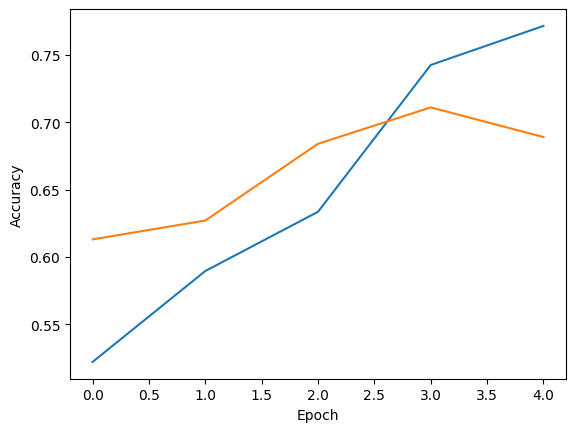

In [36]:
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')